# Mall Customer Grouping using K Means Clustering Algorithm


***Problem Statement***: Group customers of a retail store based on their purchase history

***Dataset***: The dataset used is [Mall Customer Segmentation Data]('https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data') from Kaggle. It has following dataset attributes:

* CustomerID : Unique ID assigned to the customer
* Gender : Gender of the customer
* Age : Age of the customer
* Annual Income (k dollars) : Annual Income of the customer
* Spending Score (1-100) : Score assigned by the mall based on customer behavior and spending nature

***Methodology***:

The following steps are adapted to perform the prediction:

1. Data Collection and Exploration 
2. Exploratory Data Analysis (EDA) 
3. Feature Engineering
4. Model Building

## 1. Data Collection and Exploration

### a. Import the necessary libraries

In [1]:
# Import modules

# Modules for Data Manipulation
import numpy as np
import pandas as pd
# Modules for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

from IPython.display import display

# Sckit-learn module for Model building and evaluation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px

from datetime import datetime
import warnings 
warnings.filterwarnings('ignore')

### b. Loading the data

In [2]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')
print('Dataset Shape: ',df.shape)
df.head()

Dataset Shape:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### c. Data Exploration

In [3]:
# Find summary stats
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
# Find datatype of each column
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## 2. Exploratory Data Analysis (EDA)

In EDA, the aim is to perform activities such as data visualization, handling missing data and duplicates, correlation analysis, and data distribution analysis.

### a. Handling Missing Data 

In [5]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Check for duplicate values
df.duplicated().sum()

0

From above analysis, we can conclude that dataset is free of missing values and duplicates.

### b. Data Visualization

In [7]:
# Rename columns
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# Segregate numerical and categorical features
numerical_features = ['Age' , 'Income' , 'Score']
categorical_features = ['Gender']

# drop useless column
df.drop('CustomerID', axis = 1, inplace = True)

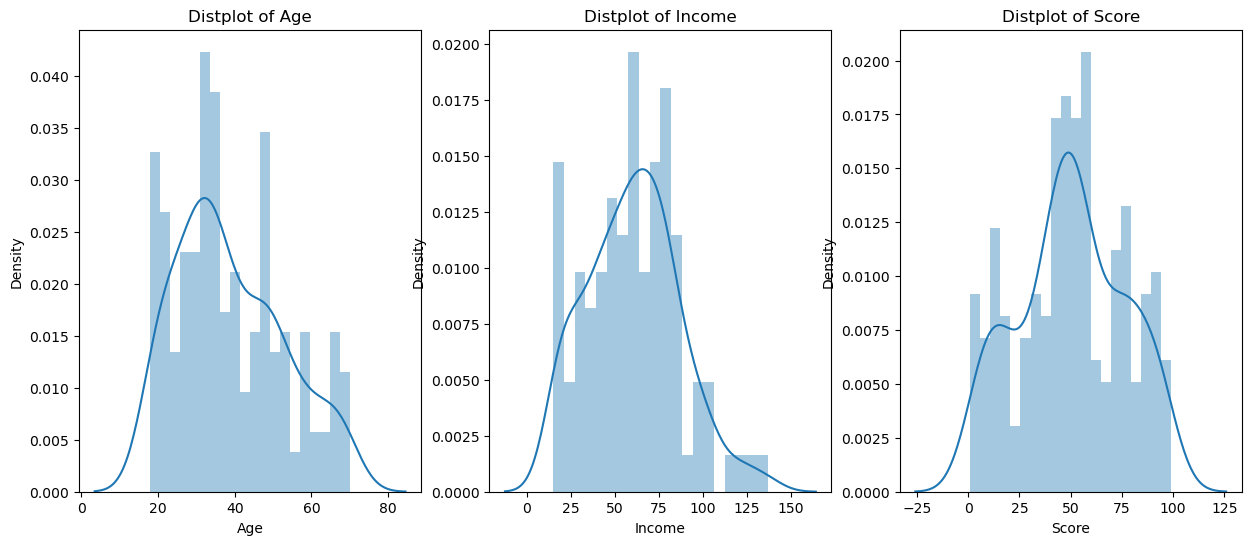

In [9]:
# Data Distribution of Numerical features using Histogram

plt.figure(figsize = (15 , 6))
n = 0 
for f in numerical_features:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(df[f] , bins = 20)
    plt.title('Distplot of {}'.format(f))
plt.show()

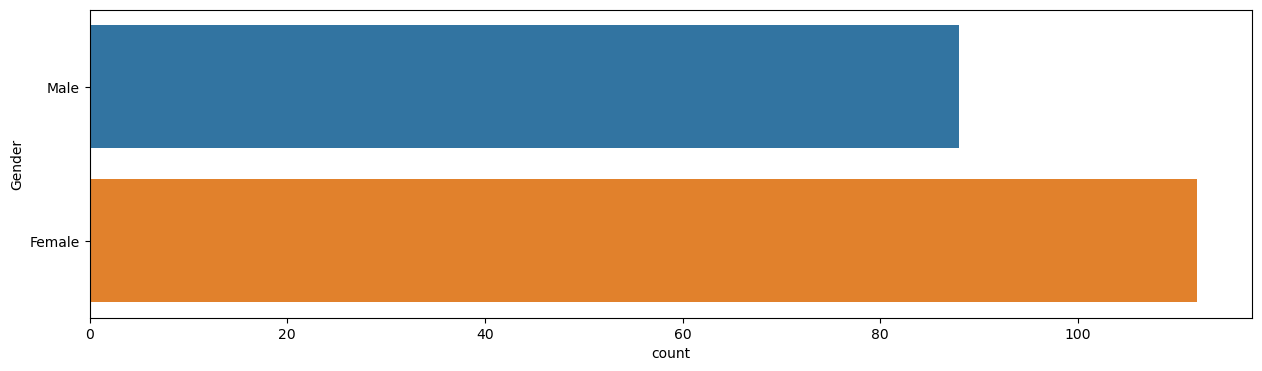

In [10]:
# Data Distribution of Categorical features using Countplot
plt.figure(figsize = (15 , 4))
sns.countplot(y = 'Gender' , data = df)
plt.show()

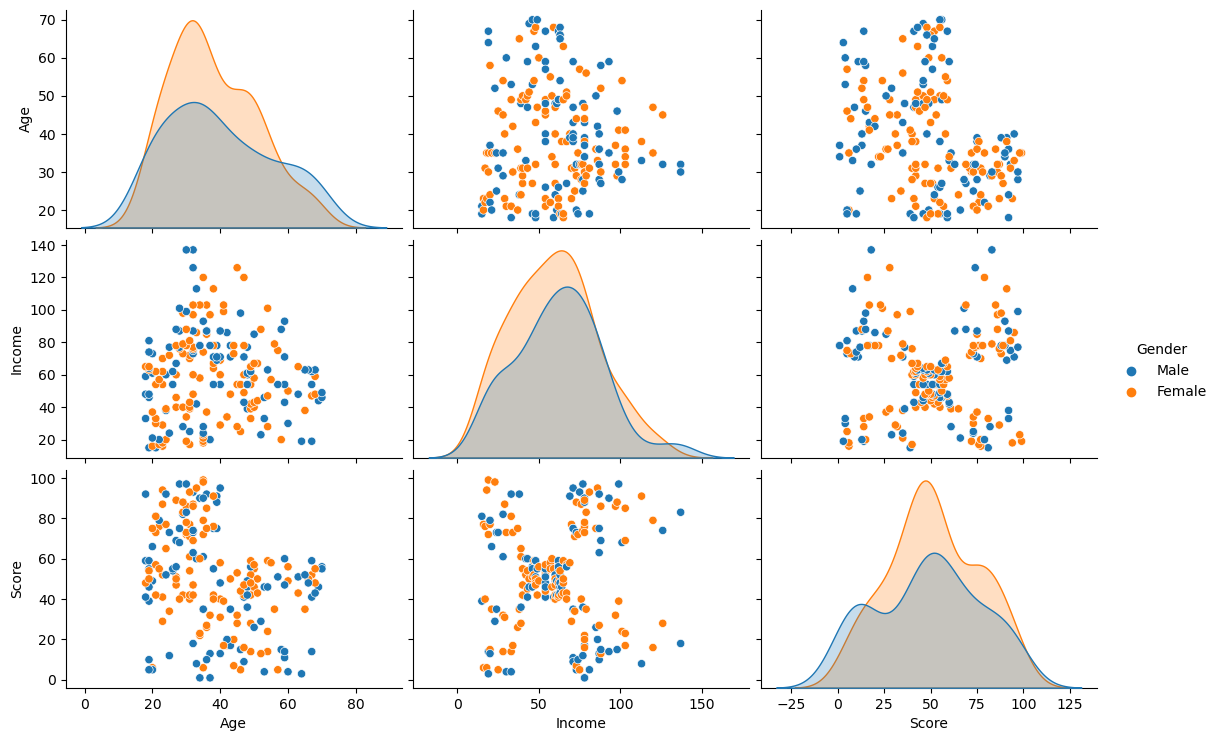

In [11]:
# Data distribution with Pairplot
sns.pairplot(df.loc[:, 'Gender':], hue='Gender', aspect=1.5)
plt.show()

### c. Correlation Analysis

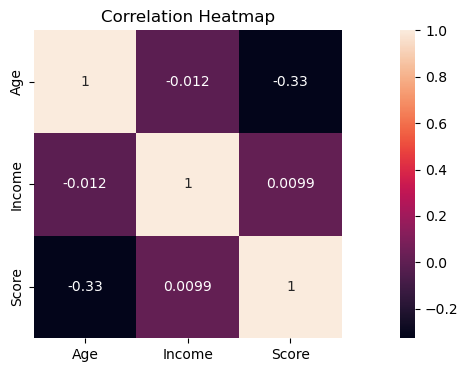

In [12]:
# Define correlation matrix
corr = df[numerical_features].corr()

#Plot the correlation matrix
plt.figure(figsize=(15,4))
sns.heatmap(corr, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show();

## 3. Feature Engineering 

### a. Encoding of Categorical Features

In [13]:
le = LabelEncoder()
df_encoded = df.copy(deep = True)

df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

print('Label Encoder Transformation')
print(df_encoded['Gender'].unique(),' = ',le.inverse_transform(df_encoded['Gender'].unique()))

Label Encoder Transformation
[1 0]  =  ['Male' 'Female']


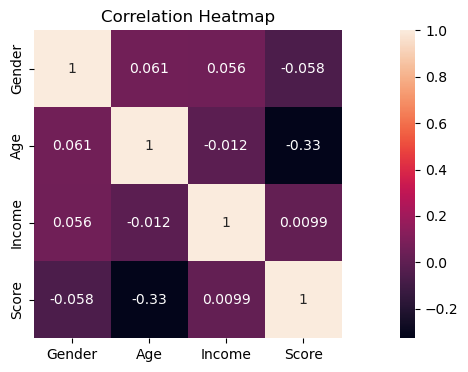

In [14]:
# Define correlation matrix
corr = df_encoded.corr()

#Plot the correlation matrix
plt.figure(figsize=(15,4))
sns.heatmap(corr, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show();

### b. Feature Scaling Using Standardization

In [15]:
# Standardization
sc = StandardScaler() 

df_scaled = df_encoded.copy(deep = True)

# Normalization
df_scaled[numerical_features] = sc.fit_transform(df_scaled[numerical_features])

## 4. Model Building

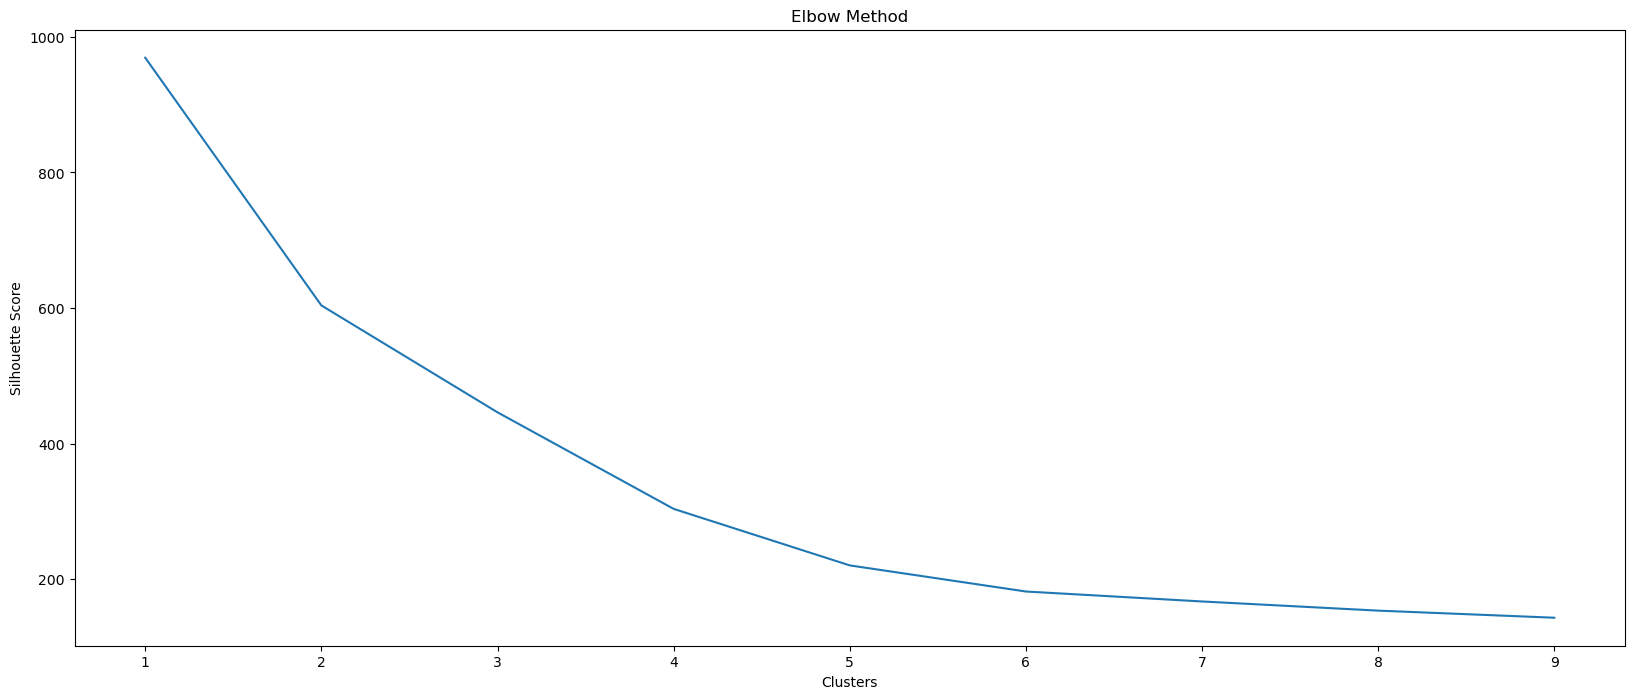

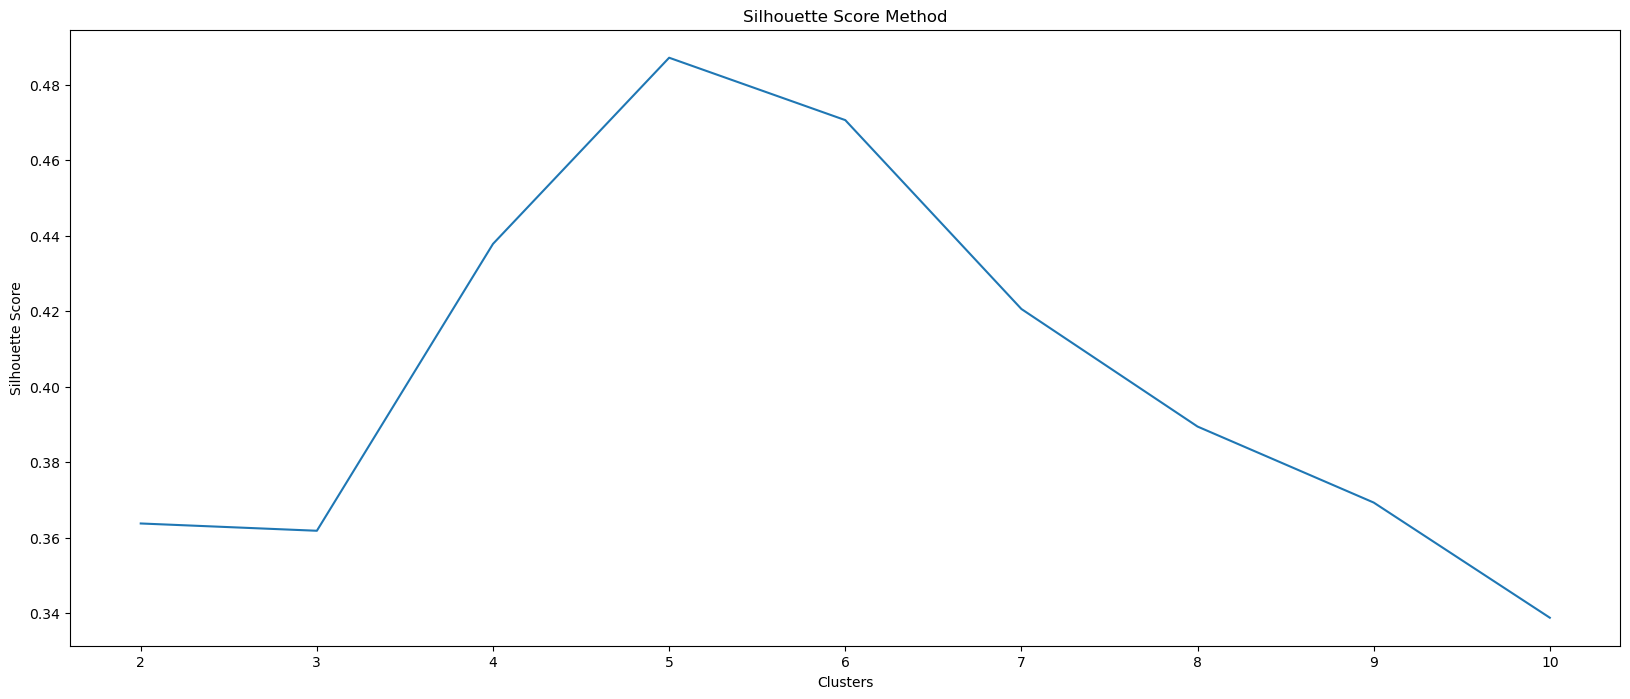

In [35]:
# K-Means Clustering Model Building
clusters = []
sil_score = []

# Visualizing the ELBOW method to get the optimal value of K 
for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(df_scaled)
    clusters.append(km.inertia_)
    
fig = plt.figure(figsize=(20,8))
sns.lineplot(x=range(1, 10), y=clusters)
plt.title('Elbow Method')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Silhouette Score Method   
for i in range(2, 11):
    km = KMeans(n_clusters=i).fit(df_scaled)
    labels = km.labels_
    sil_score.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))

fig = plt.figure(figsize=(20,8))
sns.lineplot(x = range(2, 11), y = sil_score);
plt.title('Silhouette Score Method')
plt.xlabel("Clusters")
plt.ylabel("Silhouette Score")
plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be 5. 

In [33]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5,  random_state= 42).fit(df_scaled)
df_scaled['Labels'] = km5.labels_
centroids = np.array(km5.cluster_centers_)

# Plot 6 cluster in 3d Scatterplot
fig = px.scatter_3d(df_scaled, x="Income", y="Score", z="Age",
                    color = 'Labels', size = 'Labels')
fig.show();

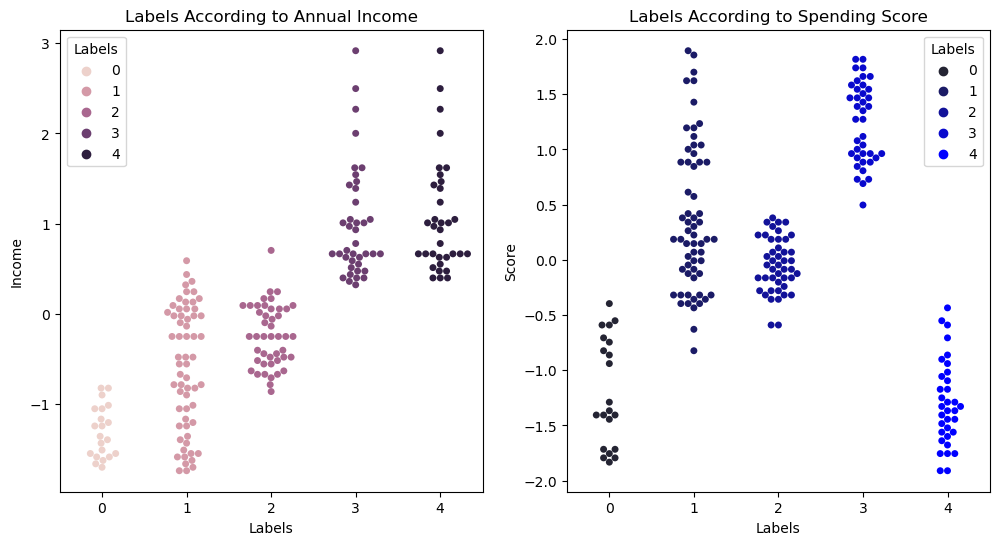

In [34]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=df_scaled, ax=ax, hue='Labels')
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=df_scaled, ax=ax, hue='Labels', color='b')
ax.set_title('Labels According to Spending Score')

plt.show()

As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyze our 5 clusters in detail now:

* Label 0 is low income and low spending score
* Label 1 is low income and high spending score
* Label 2 is mid income and mid spending score
* Label 3 is high income and high spending score
* Label 4 is high income and low spending score